What is the most optimal skill to learn for Data Analysts?

Methodology
1. Group skills to determine median salary and likelihood of being in posting
2. Visualize median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevalent

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US = (df[
    (df['job_title_short'] == 'Data Analyst') & 
    (df['job_country'] == 'United States')]
    .dropna(subset=['salary_year_avg'])
    .copy()
)

df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782637,Data Analyst,Data Integration Analyst,"Germantown, WI",via ZipRecruiter,Full-time,False,"Illinois, United States",2023-01-20 06:18:43,True,False,United States,year,70000.0,NaN,Virtual Benefits Administrator,"[vba, sql, sql server]","{'databases': ['sql server'], 'programming': [..."
782798,Data Analyst,Reference Data Analyst,"New York, NY",via Ai-Jobs.net,Full-time,False,"New York, United States",2023-04-21 05:59:51,True,False,United States,year,111175.0,NaN,DRW,[terminal],{'other': ['terminal']}
783588,Data Analyst,Data Analytics Manager,"Chicago, IL",via Ladders,Full-time,False,"Illinois, United States",2023-01-09 06:01:18,False,False,United States,year,125000.0,NaN,"United Air Lines, Inc","[sql, r, python, hadoop, excel]","{'analyst_tools': ['excel'], 'libraries': ['ha..."
783866,Data Analyst,Lead Credit Bureau Data Analyst,"Des Plaines, IL",via Ladders,Full-time,False,"Illinois, United States",2023-06-02 06:02:06,False,True,United States,year,115000.0,NaN,Discover Financial Services,[unix],{'os': ['unix']}


In [3]:
df_DA_US_exploded = df_DA_US.explode('job_skills').copy()
df_DA_US_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,python,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,r,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,alteryx,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,tableau,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,excel,"{'analyst_tools': ['excel', 'powerpoint']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,sql,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,vba,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,tableau,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,excel,"{'analyst_tools': ['tableau', 'excel', 'altery..."


In [4]:
df_DA_skills = (df_DA_US_exploded
    .groupby('job_skills')['salary_year_avg']
    .agg(['count', 'median'])
    .sort_values(by='count', ascending=False)
    .copy()
)

df_DA_skills

,count,median
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
theano,1,100000.0
typescript,1,65000.0
vmware,1,147500.0


In [5]:
df_DA_skills = df_DA_skills.rename(columns={'count' : 'skill_count', 'median' : 'median_salary'})
df_DA_skills

,skill_count,median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
theano,1,100000.0
typescript,1,65000.0
vmware,1,147500.0


In [6]:
DA_job_count = len(df_DA_US)

In [7]:
df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100
df_DA_skills['skill_percent']

job_skills
sql           57.655172
excel         41.563218
python        32.896552
tableau       31.356322
sas           21.287356
                ...    
theano         0.022989
typescript     0.022989
vmware         0.022989
vue            0.022989
wrike          0.022989
Name: skill_percent, Length: 170, dtype: float64

In [8]:
skill_limit = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit].copy()
df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


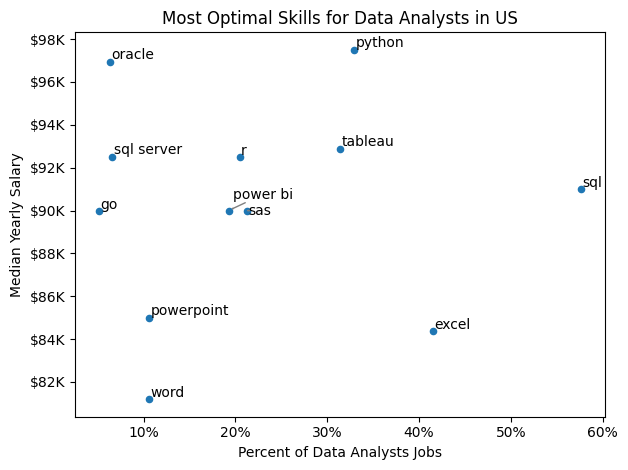

In [9]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter
df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

plt.title(f"Most Optimal Skills for Data Analysts in US")
plt.xlabel('Percent of Data Analysts Jobs')
plt.ylabel('Median Yearly Salary')
plt.tight_layout()

texts = []

for i, x in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], x))

ax = plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter())
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))


plt.show()

In [10]:
# Drop duplicates and NaN values
df_technology = df['job_type_skills'].drop_duplicates().dropna().copy()
df_technology

1         {'analyst_tools': ['power bi', 'tableau'], 'pr...
2         {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3         {'cloud': ['aws'], 'libraries': ['tensorflow',...
4         {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
5         {'cloud': ['gcp'], 'programming': ['python', '...
                                ...                        
785697    {'analyst_tools': ['power bi', 'tableau', 'wor...
785721    {'analyst_tools': ['looker', 'tableau', 'splun...
785725    {'cloud': ['bigquery'], 'libraries': ['gdpr'],...
785735    {'cloud': ['bigquery', 'aws'], 'libraries': ['...
785736    {'os': ['linux', 'unix'], 'other': ['kubernete...
Name: job_type_skills, Length: 177562, dtype: object

In [11]:
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:
            technology_dict[key] = value  # if doesn't exist in technology_dict, add key and value

In [12]:
# Remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['power bi',
  'esquisse',
  'visio',
  'powerbi',
  'word',
  'splunk',
  'cognos',
  'nuix',
  'ms access',
  'dax',
  'sas',
  'qlik',
  'excel',
  'powerpoint',
  'spreadsheet',
  'sharepoint',
  'looker',
  'outlook',
  'spss',
  'alteryx',
  'sheets',
  'microstrategy',
  'ssis',
  'tableau',
  'datarobot',
  'msaccess',
  'sap',
  'ssrs'],
 'programming': ['vb.net',
  'erlang',
  'mongodb',
  'assembly',
  'groovy',
  'visual basic',
  'no-sql',
  'visualbasic',
  'ruby',
  'golang',
  'c',
  'nosql',
  'julia',
  'php',
  'crystal',
  'cobol',
  't-sql',
  'sas',
  'shell',
  'typescript',
  'sql',
  'apl',
  'lua',
  'css',
  'delphi',
  'scala',
  'java',
  'swift',
  'f#',
  'python',
  'ocaml',
  'powershell',
  'matlab',
  'clojure',
  'perl',
  'javascript',
  'sass',
  'mongo',
  'c++',
  'kotlin',
  'elixir',
  'dart',
  'vba',
  'bash',
  'objective-c',
  'rust',
  'solidity',
  'c#',
  'fortran',
  'lisp',
  'r',
  'html',
  'pascal',
  'go',
  'hask

In [13]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])
df_technology

,technology,skills
0,analyst_tools,"[power bi, esquisse, visio, powerbi, word, spl..."
1,programming,"[vb.net, erlang, mongodb, assembly, groovy, vi..."
2,cloud,"[linode, gcp, vmware, redshift, snowflake, dig..."
3,libraries,"[jupyter, ggplot2, spark, tensorflow, dplyr, f..."
4,other,"[docker, bitbucket, flow, chef, svn, atlassian..."
5,databases,"[neo4j, sqlserver, mongodb, couchdb, cassandra..."
6,os,"[ubuntu, wsl, linux, macos, redhat, arch, fedo..."
7,async,"[microsoft lists, monday.com, jira, notion, wr..."
8,webframeworks,"[deno, phoenix, asp.net core, ruby, ruby on ra..."
9,sync,"[ringcentral, twilio, wire, slack, symphony, m..."


In [14]:
df_technology = df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,power bi
0,analyst_tools,esquisse
0,analyst_tools,visio
0,analyst_tools,powerbi
0,analyst_tools,word
...,...,...
9,sync,webex
9,sync,rocketchat
9,sync,mattermost
9,sync,google chat


In [15]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills').copy()

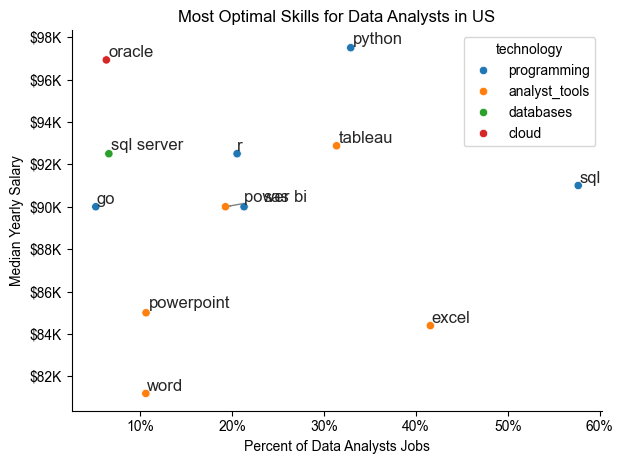

In [16]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.set_theme(style='ticks')
sns.despine()

plt.title(f"Most Optimal Skills for Data Analysts in US")
plt.xlabel('Percent of Data Analysts Jobs')
plt.ylabel('Median Yearly Salary')
plt.tight_layout()

texts = []

for i, x in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], x))

ax = plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter())
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

plt.show()